Keras公式ブログをベースにしたCNN    
https://keras.io/examples/mnist_cnn/

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10 # 0～9までの手書き文字
epochs = 12 # 訓練データを何回繰り返して学習させるのか

img_rows, img_cols = 28, 28

In [36]:
%%time
(x_train, y_train), (x_test, y_test) = mnist.load_data()

CPU times: user 297 ms, sys: 55.5 ms, total: 353 ms
Wall time: 358 ms


In [37]:
x_train.shape

(60000, 28, 28)

In [0]:
# backendがTensorflowとTheanoで配列のshapeが異なるために2パターン記述
if K.image_data_format() == 'channels_first':
  # 1次元配列に変換
  x_train = x_train.reshape(s_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)

else:
  # 1次元配列に変換
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

In [39]:
x_train.shape

(60000, 28, 28, 1)

In [40]:
# 入力データ[0, 1]の範囲に正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 255で割ったものを新たに変数とする
x_train /= 255
x_test /= 255

print('x_train shape : ', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape :  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [41]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
# ラベルをバイナリベクトルとして扱う
# Kerasはレベルを数値ではなく、0or1を要素に持つベクトルで扱うため
"""
例えば、サンプルに対するターゲットが「5」の場合次のような形になります。
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
"""
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [43]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 損失関数,最適化関数,評価指標を指定してモデルをコンパイル
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [46]:
%%time
history = model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 158us/step - loss: 0.2531 - acc: 0.9237 - val_loss: 0.0526 - val_acc: 0.9832
Epoch 2/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0844 - acc: 0.9745 - val_loss: 0.0383 - val_acc: 0.9875
Epoch 3/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0648 - acc: 0.9805 - val_loss: 0.0293 - val_acc: 0.9903
Epoch 4/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.0530 - acc: 0.9838 - val_loss: 0.0314 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0460 - acc: 0.9860 - val_loss: 0.0272 - val_acc: 0.9909
Epoch 6/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0376 - acc: 0.9881 - val_loss: 0.0298 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0339 - acc: 0.9893 - val_loss: 0.0252 -

In [47]:
# モデルの評価
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027517007050572556
Test accuracy: 0.9927


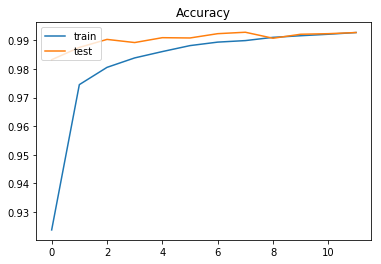

In [48]:
import matplotlib.pyplot as plt
# 学習をグラフ化（正解率）
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
#Gplt.show()

In [49]:
#Google Driveをマウントする
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
base_dir = "/content/drive/My Drive/colaboratory/MNIST"
model.save(os.path.join(base_dir,"mnist_cnn.h5"))

In [61]:
%%time
from keras.models import load_model
model1 = load_model(os.path.join(base_dir,"mnist_cnn.h5"))

CPU times: user 1.3 s, sys: 43.5 ms, total: 1.35 s
Wall time: 1.93 s
